<a href="https://colab.research.google.com/github/dbonekamp/imageProcessingAndR/blob/main/R_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext rpy2.ipython

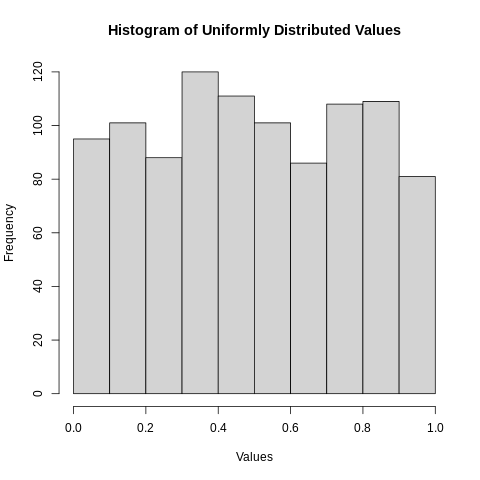

In [5]:
# prompt: write R code to generate 1000 uniformly distributed values and plot a histogram of these values

%%R
# Generate 1000 uniformly distributed values
values <- runif(1000)

# Plot a histogram
hist(values, main = "Histogram of Uniformly Distributed Values", xlab = "Values", ylab = "Frequency")


--2024-09-06 10:28:59--  http://www.informatik.uni-leipzig.de/~wiebel/public_data/abdominal_xw/abdominal_xw_t2hastetra2stepmbh3202A.nii.gz
Resolving www.informatik.uni-leipzig.de (www.informatik.uni-leipzig.de)... 139.18.4.2, 2001:638:902:2004::4:2
Connecting to www.informatik.uni-leipzig.de (www.informatik.uni-leipzig.de)|139.18.4.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4192842 (4.0M) [application/gzip]
Saving to: ‘current_mri.nii.gz’

current_mri.nii.gz  100%[===================>]   4.00M  3.17MB/s    in 1.3s    

2024-09-06 10:29:01 (3.17 MB/s) - ‘current_mri.nii.gz’ saved [4192842/4192842]



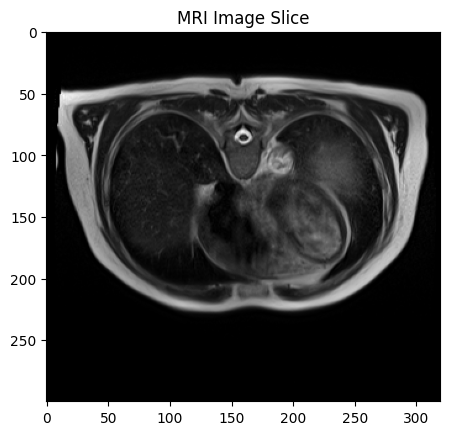

In [14]:
# prompt: load a medical mri image from the web and display it

# !pip install SimpleITK
import SimpleITK as sitk
import matplotlib.pyplot as plt

image_url = "http://www.informatik.uni-leipzig.de/~wiebel/public_data/abdominal_xw/abdominal_xw_t2hastetra2stepmbh3202A.nii.gz"  # Replace with your image URL

# Download the image
!wget -O current_mri.nii.gz {image_url}

# Read the image
image = sitk.ReadImage("current_mri.nii.gz")

# Get the image array
image_array = sitk.GetArrayViewFromImage(image)

# Display a slice of the image
plt.imshow(image_array[50], cmap="gray")
plt.title("MRI Image Slice")
plt.show()


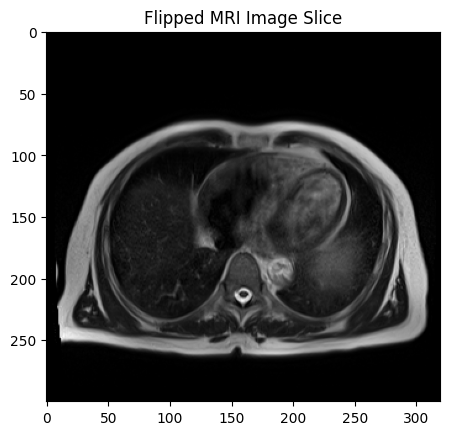

In [15]:
# prompt: perform a flip of the vertical axis on the image and display it

import matplotlib.pyplot as plt
# Flip the image vertically
flipped_image_array = image_array[:, ::-1, :]

# Display the flipped slice
plt.imshow(flipped_image_array[50], cmap="gray")
plt.title("Flipped MRI Image Slice")
plt.show()


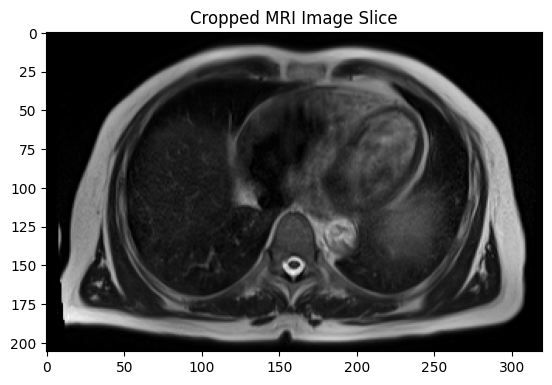

In [20]:
# prompt: crop the image as much as possible and display it, use a threshold to determine background and set the threshold to 10% of the standard deviation of the image

import matplotlib.pyplot as plt
import numpy as np

# Calculate the standard deviation of the image
std_dev = np.std(flipped_image_array)

# Calculate the threshold
threshold = 0.2 * std_dev

# Find non-zero indices
rows, cols, _ = np.where(flipped_image_array > threshold)

# Find the minimum and maximum indices for cropping
min_row = np.min(rows)
max_row = np.max(rows)
min_col = np.min(cols)
max_col = np.max(cols)

# Crop the image
cropped_image_array = flipped_image_array[min_row:max_row+1, min_col:max_col+1, :]

# Display the cropped slice
plt.imshow(cropped_image_array[50], cmap="gray")
plt.title("Cropped MRI Image Slice")
plt.show()


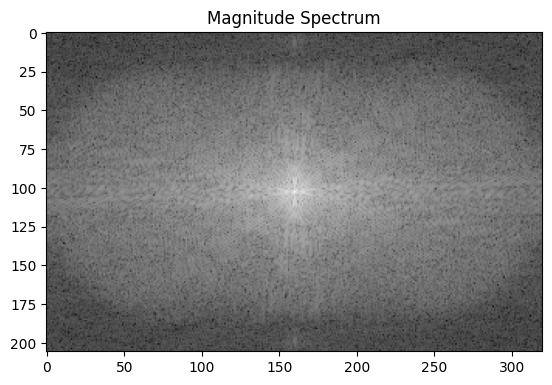

In [22]:
# prompt: perform a 2d fourier transform of this image and display the result

import numpy as np
import matplotlib.pyplot as plt

# Calculate the 2D Fourier transform
f_transform = np.fft.fft2(cropped_image_array[50])

# Shift the zero-frequency component to the center
f_shift = np.fft.fftshift(f_transform)

# Display the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_shift) + 1)  # Add 1 to avoid log(0)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


In [25]:
# prompt: Give me a dummy dataset of cars in R and perform a statistical test if one of the parameters is significantly larger if a condition about another parameter is met, but make those two related in the following way: parameterA = parameterB^2 + noise.

%%R
# Set seed for reproducibility
set.seed(123)

# Generate dummy data
n <- 100
parameterB <- rnorm(n, mean = 10, sd = 2)
parameterA <- parameterB^2 + rnorm(n, mean = 0, sd = 5)
condition <- parameterB > 11

# Create a data frame
df <- data.frame(parameterA, parameterB, condition)

# Perform a t-test
t.test(parameterA ~ condition, data = df)



	Welch Two Sample t-test

data:  parameterA by condition
t = -12.348, df = 51.769, p-value < 2.2e-16
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -74.93058 -53.97948
sample estimates:
mean in group FALSE  mean in group TRUE 
           87.07429           151.52932 



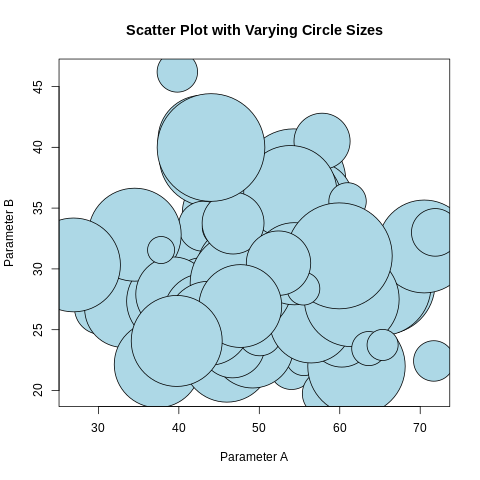

In [26]:
# prompt: Give me an example how to plot a graph with differently sized circles representing, parameterA along the x-axis, parameterB along the y-axis and parameterC as the size of the circle - create a dummy dataset for that. Do this in R.

%%R
# Set seed for reproducibility
set.seed(123)

# Generate dummy data
n <- 100
parameterA <- rnorm(n, mean = 50, sd = 10)
parameterB <- rnorm(n, mean = 30, sd = 5)
parameterC <- runif(n, min = 5, max = 20)

# Create a data frame
df <- data.frame(parameterA, parameterB, parameterC)

# Plot the graph
plot(df$parameterA, df$parameterB,
     xlab = "Parameter A",
     ylab = "Parameter B",
     main = "Scatter Plot with Varying Circle Sizes",
     pch = 21,
     bg = "lightblue",
     cex = df$parameterC / max(df$parameterC) * 20) # Normalize size for better visualization
